<a href="https://colab.research.google.com/github/zenobiapanvelwalla/low-code-book-projects/blob/main/Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import tensorflow as tf

In [4]:
print('scikit_learn version', sklearn.__version__)
print('tensorflow version', tf.__version__)

scikit_learn version 1.6.1
tensorflow version 2.18.0


In [5]:
file_loc=('https://storage.googleapis.com/low-code-ai-book/churn_dataset.csv')

In [6]:
df_raw=pd.read_csv(file_loc)

In [6]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_raw.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_raw['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


In [7]:
mask = df_raw['TotalCharges'] == ' '
df_raw[mask].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [8]:
df_raw[df_raw['tenure'] == 0][['tenure', 'TotalCharges']]

,tenure,TotalCharges
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


In [9]:
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
mask = (df_raw['tenure'] == 0)
df_1[mask][['tenure', 'TotalCharges']]

,tenure,TotalCharges
488,0,0.0
753,0,0.0
936,0,0.0
1082,0,0.0
1340,0,0.0
3331,0,0.0
3826,0,0.0
4380,0,0.0
5218,0,0.0
6670,0,0.0


In [10]:
df_2 = df_1.astype({'TotalCharges': 'float64'})
df_2.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df_2.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [11]:
df_3 = df_2.copy()
df_3 = df_3.drop(columns=['gender', 'StreamingTV', 'StreamingMovies', 'PhoneService'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df_3['AvgMonthlyCharge'] = (df_3['TotalCharges'].div(df_3['tenure'])).replace(np.nan,0)

In [13]:
df_3['DiffCharges'] = df_3['MonthlyCharges'].sub(df_3['AvgMonthlyCharge'])
df_3['DiffCharges'].describe()

,DiffCharges
count,7043.000000
mean,0.063475
std,3.211815
min,-18.900000
25%,-1.159091
50%,0.000000
75%,1.154880
max,80.850000


In [14]:
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharge', 'DiffCharges'],
      dtype='object')

<ipython-input-15-adfb3dddba85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_3.groupby(feature_name)['Churn'].value_counts(normalize=True)).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))


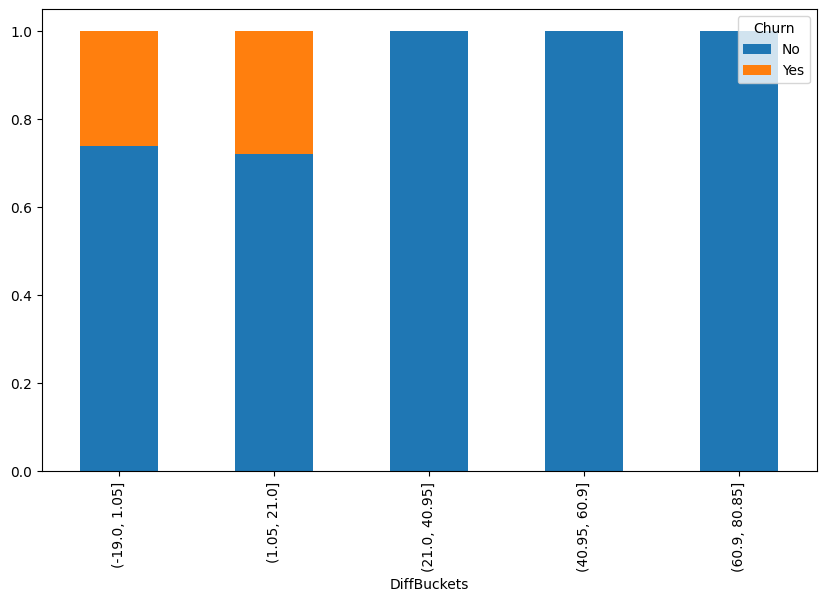

In [15]:
def plot_cat_feature_dist(feature_name):
  (df_3.groupby(feature_name)['Churn'].value_counts(normalize=True)).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

df_3['DiffBuckets'] = pd.cut(df_3['DiffCharges'], bins=5)

plot_cat_feature_dist('DiffBuckets')

<ipython-input-15-adfb3dddba85>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_3.groupby(feature_name)['Churn'].value_counts(normalize=True)).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))


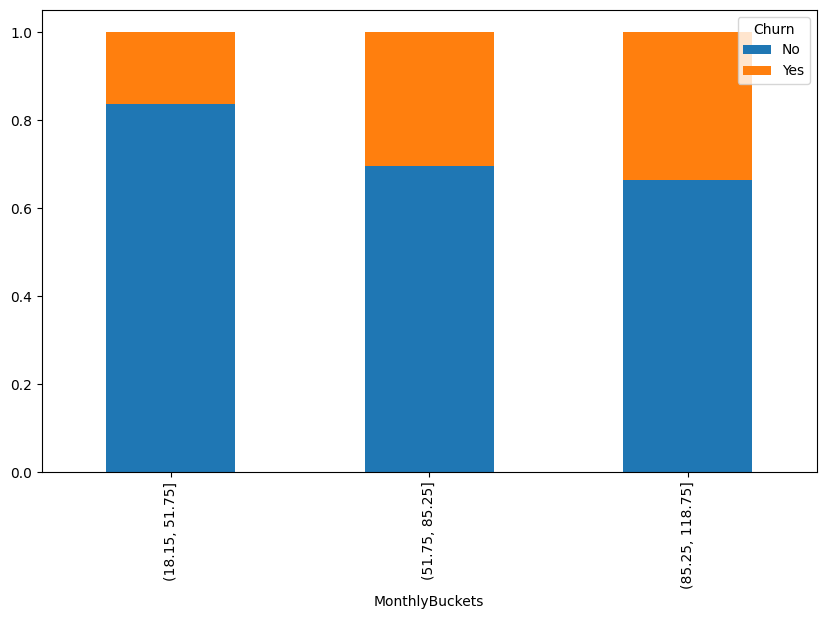

In [16]:
df_3['MonthlyBuckets'] = pd.cut(df_3['MonthlyCharges'], bins=3)

plot_cat_feature_dist('MonthlyBuckets')

In [17]:
df_3 = df_3.drop(columns=['TotalCharges', 'DiffCharges', 'MonthlyBuckets', 'AvgMonthlyCharge'])
df_3.columns

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn', 'DiffBuckets'],
      dtype='object')

In [18]:
df_3 = df_3.drop(columns=['customerID'])
df_3.dtypes

,0
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object
DeviceProtection,object
TechSupport,object


In [19]:
df_prep = df_3.replace('No internet service', 'No')
df_prep[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']].nunique()

,0
OnlineSecurity,2
OnlineBackup,2
DeviceProtection,2


In [20]:
# performing one-hot encoding on categorial features
from sklearn.preprocessing import OneHotEncoder

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'DiffBuckets']

x_num = df_prep[numeric_columns]
x_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
x_cat_trans = ohe.fit_transform(x_cat)

In [21]:
x_cat_trans.toarray()[0]
ohe.inverse_transform(x_cat_trans.toarray())[0]

array(['Yes', 'No', 'No phone service', 'DSL', 'No', 'Yes', 'No', 'No',
       'Month-to-month', 'Yes', 'Electronic check',
       Interval(-19.0, 1.05, closed='right')], dtype=object)

In [22]:
X = np.concatenate([x_num, x_cat_trans.toarray()], axis=1)
y = df_prep['Churn'].values

In [23]:
y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=113)
X_train.shape

(5634, 28)

In [25]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression()
cls.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
cls.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
cls.score(X_test, y_test)

0.4804826117814053

In [28]:
X_test_scaled = scaler.transform(X_test)
cls.score(X_test_scaled, y_test)

0.8005677785663591

In [30]:
from sklearn.metrics import confusion_matrix
y_pred = cls.predict(X_test_scaled)
confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

#                 "predicted positives"   | "predicted negatives"
# actual postives "True positives" (TP)   | "False negatives" (FN)
# actual negatives "False Positives" (FP) | "True Negatives" (TN)


array([[185, 187],
       [ 94, 943]])

In [31]:
from sklearn.metrics import precision_score, recall_score

print('Precision: ', precision_score(y_test, y_pred, labels=['Yes', 'No'], pos_label='Yes'))
print('Recall: ', recall_score(y_test, y_pred, labels=['Yes', 'No'], pos_label='Yes'))


Precision:  0.6630824372759857
Recall:  0.49731182795698925


In [32]:
import json

example = json.loads('{"customerID": "7090-HPOJU", "gender": "Female", "SeniorCitizen": 0, "Partner": "Yes", "Dependents": "Yes", "tenure": 66,"PhoneService": "Yes", "MultipleLines": "Yes", "InternetService": "DSL","OnlineSecurity": "Yes", "OnlineBackup": "Yes", "DeviceProtection": "Yes","TechSupport": "No", "StreamingTV": "No", "StreamingMovies": "No","Contract": "Month-to-month", "PaperlessBilling": "Yes", "PaymentMethod": "Bank transfer (automatic)", "MonthlyCharges": 67.45, "TotalCharges": "4508.65"}')
ex_df = pd.DataFrame([example])
ex_df['TotalCharges'] = ex_df['TotalCharges'].astype('float64')
ex_df = ex_df.drop(columns=['customerID','gender',
                            'StreamingTV','StreamingMovies',
                            'PhoneService'])

ex_df['AvgMonthlyCharge'] = ex_df['TotalCharges']/ex_df['tenure']
ex_df['DiffCharges'] = ex_df['MonthlyCharges']-ex_df['AvgMonthlyCharge']
ex_df['DiffBuckets'] = pd.cut(ex_df['DiffCharges'],
                           bins=[-18.938,-11.295,-3.69,3.915,11.52,19.125])
ex_df.pop('DiffCharges')

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup',
                       'DeviceProtection','TechSupport','Contract',
                       'PaperlessBilling','PaymentMethod','DiffBuckets']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

X_cat_trans = ohe.transform(X_cat)

X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
X_scaled = scaler.transform(X)

cls.predict(X)

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [33]:
# CODE IN THE CELL ABOVE IN FUNCTION
def custom_predict_routine(example):
  ex_df = pd.DataFrame([example])
  ex_df['TotalCharges'] = ex_df['TotalCharges'].astype('float64')
  ex_df = ex_df.drop(columns=['customerID','gender',
                            'StreamingTV','StreamingMovies',
                            'PhoneService'])

  ex_df['AvgMonthlyCharge'] = ex_df['TotalCharges']/ex_df['tenure']
  ex_df['DiffCharges'] = ex_df['MonthlyCharges']-ex_df['AvgMonthlyCharge']
  ex_df['DiffBuckets'] = pd.cut(ex_df['DiffCharges'],
                            bins=[-18.938,-11.295,-3.69,3.915,11.52,19.125])
  ex_df.pop('DiffCharges')

  numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
  categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                        'InternetService','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport','Contract',
                        'PaperlessBilling','PaymentMethod','DiffBuckets']

  X_num = df_prep[numeric_columns]
  X_cat = df_prep[categorical_columns]

  X_cat_trans = ohe.transform(X_cat)

  X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
  X_scaled = scaler.transform(X)

  return cls.predict(X)




In [34]:
custom_predict_routine(example)

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [35]:
import joblib
joblib.dump(cls, 'filename.joblib')
cls = joblib.load('filename.joblib')

In [36]:
def transform_fn(df):

  df = df.replace({'TotalCharges': {' ': 0.0}})
  df = df.astype({'TotalCharges':'float64'})

  df['AvgMonthlyCharge']= df['TotalCharges'].div(df['tenure'],
                                                      fill_values=0.0)

  df['DiffCharges'] = df['MonthlyCharges']-df['AvgMonthlyCharge']

  df['DiffBuckets'] = pd.cut(df['DiffCharges'], bins=5)

  df = df.drop(columns=['AvgMonthlyCharge', 'gender','StreamingTV',
                            'StreamingMovies','PhoneService',
                            'customerID', 'DiffCharges'])
  return df

In [37]:
numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                      'InternetService','OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection',
                      'TechSupport','Contract',
                      'PaperlessBilling','PaymentMethod',
                      'DiffBuckets']

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


fn_transformer = FunctionTransformer(transform_fn)
col_transformer = ColumnTransformer(
  [('ohe', OneHotEncoder(drop='if_binary'), categorical_columns),
  ('sca', MinMaxScaler(), numeric_columns)])
model = LogisticRegression()

In [39]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('preproc', fn_transformer), ('col_trans', col_transformer), ('model', model)])

In [41]:
pipe.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

le.inverse_transform([1])

array(['Yes'], dtype=object)

In [43]:
import tensorflow as tf
import tensorflow.keras as keras

train_dataset = (tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_enc))
                 .batch(128))

test_dataset = (tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_enc))
                .batch(1))

In [44]:
keras.layers.Dense(units=64, input_shape=(28,), activation="relu", name="input_layer")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Dense name=input_layer, built=False>

In [50]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            units=64, input_shape=(28,), activation="relu",
            name="input_layer2"
        ),
        keras.layers.Dense(units=32, activation="relu",
                           name="hidden_1"),
        keras.layers.Dense(units=16, activation="relu",
                           name="hidden_2"),
        keras.layers.Dense(units=1, activation="sigmoid",
                           name="output"),
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
loss_fn = keras.losses.BinaryCrossentropy()
metrics = [tf.keras.metrics.BinaryAccuracy(),
           tf.keras.metrics.Precision(),
           tf.keras.metrics.Recall()]

In [52]:
model.compile(optimizer="adam", loss=loss_fn, metrics=metrics)

In [53]:
history = model.fit(x=train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - binary_accuracy: 0.6590 - loss: 0.6199 - precision_1: 0.3447 - recall_1: 0.2863 - val_binary_accuracy: 0.7658 - val_loss: 0.4750 - val_precision_1: 0.6981 - val_recall_1: 0.1989
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - binary_accuracy: 0.7866 - loss: 0.4454 - precision_1: 0.6779 - recall_1: 0.3968 - val_binary_accuracy: 0.7977 - val_loss: 0.4440 - val_precision_1: 0.6465 - val_recall_1: 0.5161
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - binary_accuracy: 0.8017 - loss: 0.4175 - precision_1: 0.6538 - recall_1: 0.5430 - val_binary_accuracy: 0.7977 - val_loss: 0.4392 - val_precision_1: 0.6516 - val_recall_1: 0.5027
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - binary_accuracy: 0.8099 - loss: 0.4111 - precision_1: 0.6708 - recall_1: 0.5620 - val_binary_accuracy: 0.8006 - val_loss: 0.4369 - val_precision_1: 0.6532 - val_recall_1: 0.5215
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - binary_accuracy: 0.8115

In [54]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True,
)

history = model.fit(x=train_dataset, epochs=100, validation_data=test_dataset,
                    callbacks=[early_stopping])

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - binary_accuracy: 0.8224 - loss: 0.3843 - precision_1: 0.6978 - recall_1: 0.5874 - val_binary_accuracy: 0.7949 - val_loss: 0.4417 - val_precision_1: 0.6466 - val_recall_1: 0.4919
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - binary_accuracy: 0.8240 - loss: 0.3833 - precision_1: 0.7003 - recall_1: 0.5923 - val_binary_accuracy: 0.7956 - val_loss: 0.4423 - val_precision_1: 0.6500 - val_recall_1: 0.4892
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - binary_accuracy: 0.8240 - loss: 0.3824 - precision_1: 0.7003 - recall_1: 0.5928 - val_binary_accuracy: 0.7928 - val_loss: 0.4433 - val_precision_1: 0.6408 - val_recall_1: 0.4892
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - binary_accuracy: 0.8252 - loss: 0.3811 - precision_1: 0.7044 - recall_1: 0.5919 - val_binary_accuracy: 0.7913 - val_loss: 0.4440 - val_precision_1: 0.6373 - val_recall_1: 0.4866
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - binary_accuracy: 0

In [55]:
model.evaluate(test_dataset)

1409/1409 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - binary_accuracy: 0.7941 - loss: 0.4430 - precision_1: 0.6600 - recall_1: 0.5032


[0.44171857833862305,
 0.7948899865150452,
 0.6466431021690369,
 0.49193549156188965]

In [56]:
 !mkdir trainer

In [57]:
%%writefile trainer/trainer.py
# Uncomment the following line if you're running the code in a Jupyter Notebook
# %%writefile trainer/trainer.py

import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score,
                             recall_score, precision_recall_curve,
                             accuracy_score)


df_raw = pd.read_csv("/gcs/low-code-ai-book/churn_dataset.csv")
df_1 = df_raw.replace({'TotalCharges': {' ': 0.0}})
df_2 = df_1.astype({'TotalCharges':'float64'})

df_2['AvgMonthlyCharge'] = df_2['TotalCharges']/df_2['tenure']
df_2['DiffCharges']=df_2['MonthlyCharges']-df_2['AvgMonthlyCharge']

df_3 = df_2.copy()
df_prep = df_3.drop(columns=['AvgMonthlyCharge', 'gender','StreamingTV',
                          'StreamingMovies','PhoneService',
                          'customerID'])

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges']
categorical_columns = ['Partner', 'Dependents', 'MultipleLines',
                      'InternetService','OnlineSecurity',
                      'OnlineBackup', 'DeviceProtection',
                      'TechSupport','Contract',
                      'PaperlessBilling','PaymentMethod']

X_num = df_prep[numeric_columns]
X_cat = df_prep[categorical_columns]

ohe = OneHotEncoder(drop='if_binary')
X_cat_trans = ohe.fit_transform(X_cat)

X = np.concatenate((X_num.values,X_cat_trans.toarray()), axis=1)
y = df_prep['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,
                                                    random_state=113)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

cls = LogisticRegression()

cls.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = cls.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, labels=['Yes','No'],
                                   pos_label='Yes'))
print('Recall:',recall_score(y_test, y_pred, labels=['Yes','No'],
                   pos_label='Yes'))

joblib.dump(cls, '/gcs/<YOUR-BUCKET-NAME>/sklearn_model.joblib')

Writing trainer/trainer.py


In [58]:
%%writefile trainer/__init__.py
# No initialization needed

Writing trainer/__init__.py


In [59]:
%%writefile setup.py
"""Using `setuptools` to create a source distribution."""

from setuptools import find_packages, setup

setup(
    name="churn_sklearn",
    version="0.1",
    packages=find_packages(),
    include_package_data=True,
    install_requires=['gcsfs'],
    description="Training package for customer churn."
)

Writing setup.py


In [60]:
!python ./setup.py sdist --formats=gztar

running sdist
running egg_info
creating churn_sklearn.egg-info
writing churn_sklearn.egg-info/PKG-INFO
writing dependency_links to churn_sklearn.egg-info/dependency_links.txt
writing requirements to churn_sklearn.egg-info/requires.txt
writing top-level names to churn_sklearn.egg-info/top_level.txt
writing manifest file 'churn_sklearn.egg-info/SOURCES.txt'
reading manifest file 'churn_sklearn.egg-info/SOURCES.txt'
writing manifest file 'churn_sklearn.egg-info/SOURCES.txt'

running check
creating churn_sklearn-0.1
creating churn_sklearn-0.1/churn_sklearn.egg-info
creating churn_sklearn-0.1/trainer
copying files to churn_sklearn-0.1...
copying setup.py -> churn_sklearn-0.1
copying churn_sklearn.egg-info/PKG-INFO -> churn_sklearn-0.1/churn_sklearn.egg-info
copying churn_sklearn.egg-info/SOURCES.txt -> churn_sklearn-0.1/churn_sklearn.egg-info
copying churn_sklearn.egg-info/dependency_links.txt -> churn_sklearn-0.1/churn_sklearn.egg-info
copying churn_sklearn.egg-info/requires.txt -> churn_s

In [61]:
# Now move the folders created to google cloud storage. To do that run the followig
import sys

if "google.colab" in sys.modules:
  from google.colab import auth
  auth.authenticate_user()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
!gcloud config set project your-project-name
!gcloud storage cp ./dist/churn_sklearn-0.1.tar.gz gs://you-bucket-name/